In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.rcParams.update({'font.size': 16}) 

import numpy as np

# generate training and testing data

In [2]:
def gen_data(X):
    y = X[:,0] * np.sin(X[:,0]*10) + 1 + .4 * np.sin(X[:,1])
    y += np.random.uniform(0, 0.1, size=(len(y)))
    return y

In [3]:
# generate some fake data
x = np.linspace(0,1,10)
xx, yy = np.meshgrid(x,x)
xx = xx.ravel()
yy = yy.ravel()
X = np.zeros(shape=(len(xx), 2))
X[:,0] = xx
X[:,1] = yy

y = gen_data(X)

In [4]:
# validation data
# generate some fake data
x = np.linspace(0,1,20)
xx, yy = np.meshgrid(x,x)
xx = xx.ravel()
yy = yy.ravel()
X_val = np.zeros(shape=(len(xx), 2))
X_val[:,0] = xx
X_val[:,1] = yy

y_val = gen_data(X_val)

Text(0.5, 1.0, 'training set')

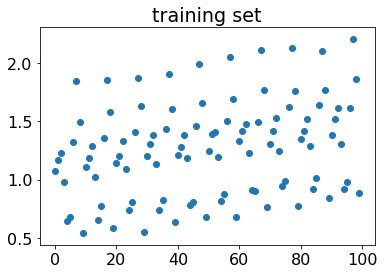

In [5]:
plt.figure()
plt.scatter(range(len(y)), y)
plt.title("training set")

Text(0.5, 1.0, 'validation set')

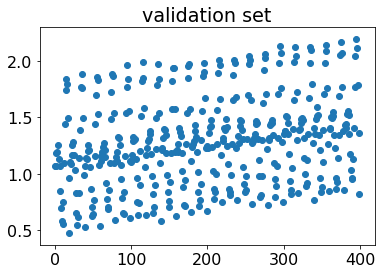

In [6]:
plt.figure()
plt.scatter(range(len(y_val)), y_val)
plt.title("validation set")

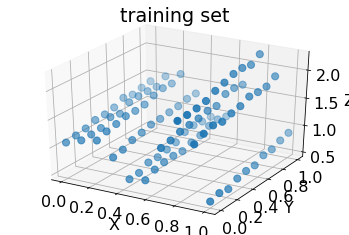

In [7]:
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.scatter(X[:,0], X[:,1], y, s=50)
plt.xlabel("X")
plt.ylabel("Y")
ax.set_zlabel("Z")
plt.title("training set")
plt.show()

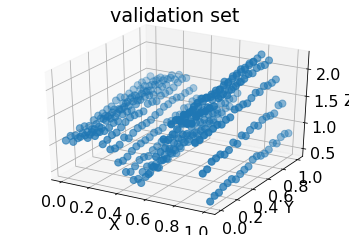

In [8]:
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.scatter(X_val[:,0], X_val[:,1], y_val, s=50)
plt.xlabel("X")
plt.ylabel("Y")
ax.set_zlabel("Z")
plt.title("validation set")
plt.show()

# import scrinet and perform fits

In [9]:
from scrinet import fits

In [10]:
dir(fits.poly)

['LinearPolynomialBasisRegression',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'findpolyfit',
 'generate_degrees',
 'np']

In [11]:
lr = fits.poly.LinearPolynomialBasisRegression()

In [12]:
?lr.fit

Signature: lr.fit(X, y, maxdegs, method='direct', max_deg_total=None)
Docstring:
input:
    X: np.ndarray. shape (N, ndim)
    y: np.ndarray. shape (N, 1)
    method: str (default: 'direct')
        'direct': np.linalg.pinv. moore-penrose pseudo inverse
        'least-squres': np.linalg.lstsq. lapack least squares algorithm

    max_deg_total: int (default: None)
        max degree of a term.
        If None then will use the maximum of `maxdegs`.

assigns the self.w_ml attribute.
These are the maximum likelihood coefficients or weights.
File:      ~/work/git/stk/scrinet/scrinet/fits/poly.py
Type:      method


In [13]:
lr.fit(X, y, maxdegs=[6,6])

In [14]:
lr.loss(X, y, return_information_criteria=True)

(0.05927339396916815,
 [-224.55947419710242, -199.70233133995956, -149.00953880344775])

In [15]:
lr.loss(X_val, y_val, return_information_criteria=True)

(0.4470599013865968,
 [-264.0250743082009, -259.3223716054982, -148.27260244206943])

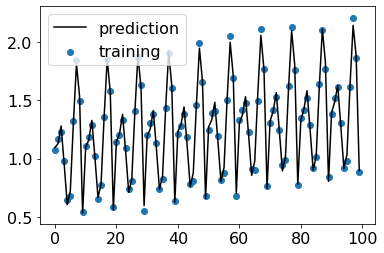

In [16]:
plt.figure()
plt.scatter(range(len(y)), y, label='training')
plt.plot(range(len(y)), lr.predict(X), label='prediction', c='k')
plt.legend()

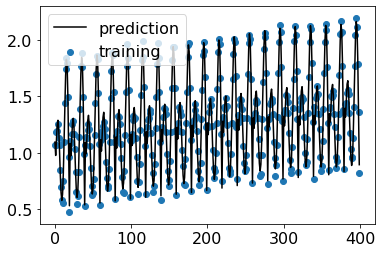

In [17]:
plt.figure()
plt.scatter(range(len(y_val)), y_val, label='training')
plt.plot(range(len(y_val)), lr.predict(X_val), label='prediction', c='k')
plt.legend()

Text(0.5, 1.0, 'training set difference')

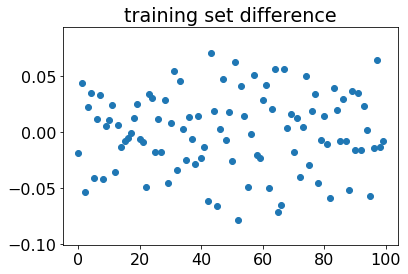

In [18]:
plt.figure()
plt.scatter(range(len(y)), y - lr.predict(X))
plt.title("training set difference")

Text(0.5, 1.0, 'training set difference')

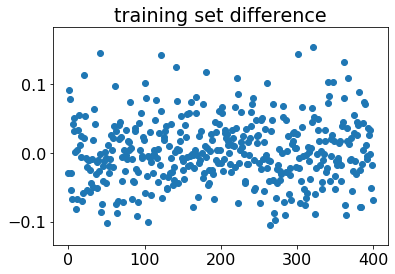

In [19]:
plt.figure()
plt.scatter(range(len(y_val)), y_val - lr.predict(X_val))
plt.title("training set difference")

# loop over deg and find best deg

In [20]:
?fits.poly.generate_degrees

Signature: fits.poly.generate_degrees(maxdegs, max_deg_total=None)
Docstring:
generates an array of monomial exponents (or degrees)
that can be used to generate a design matrix to perform
linear basis polynomial regression

intput:
    maxdegs: list of len number of dimensions
        list of max deg in each dimension
    max_deg_total: int (default: None)
        max degree of a term.
        If None then will use the maximum of `maxdegs`.

returns:
    numpy.ndarray of shape (M, dim)
    M = total number of terms
    dim = dimension
File:      ~/work/git/stk/scrinet/scrinet/fits/poly.py
Type:      function


In [22]:
max_degs = fits.poly.generate_degrees([10,10], max_deg_total=20)

In [23]:
for i, deg in enumerate(max_degs):
    print(f"{i}, {deg}")

0, [0 0]
1, [1 0]
2, [2 0]
3, [3 0]
4, [4 0]
5, [5 0]
6, [6 0]
7, [7 0]
8, [8 0]
9, [9 0]
10, [10  0]
11, [0 1]
12, [1 1]
13, [2 1]
14, [3 1]
15, [4 1]
16, [5 1]
17, [6 1]
18, [7 1]
19, [8 1]
20, [9 1]
21, [10  1]
22, [0 2]
23, [1 2]
24, [2 2]
25, [3 2]
26, [4 2]
27, [5 2]
28, [6 2]
29, [7 2]
30, [8 2]
31, [9 2]
32, [10  2]
33, [0 3]
34, [1 3]
35, [2 3]
36, [3 3]
37, [4 3]
38, [5 3]
39, [6 3]
40, [7 3]
41, [8 3]
42, [9 3]
43, [10  3]
44, [0 4]
45, [1 4]
46, [2 4]
47, [3 4]
48, [4 4]
49, [5 4]
50, [6 4]
51, [7 4]
52, [8 4]
53, [9 4]
54, [10  4]
55, [0 5]
56, [1 5]
57, [2 5]
58, [3 5]
59, [4 5]
60, [5 5]
61, [6 5]
62, [7 5]
63, [8 5]
64, [9 5]
65, [10  5]
66, [0 6]
67, [1 6]
68, [2 6]
69, [3 6]
70, [4 6]
71, [5 6]
72, [6 6]
73, [7 6]
74, [8 6]
75, [9 6]
76, [10  6]
77, [0 7]
78, [1 7]
79, [2 7]
80, [3 7]
81, [4 7]
82, [5 7]
83, [6 7]
84, [7 7]
85, [8 7]
86, [9 7]
87, [10  7]
88, [0 8]
89, [1 8]
90, [2 8]
91, [3 8]
92, [4 8]
93, [5 8]
94, [6 8]
95, [7 8]
96, [8 8]
97, [9 8]
98, [10  8]
99

In [24]:
best_lr, best_deg_idx, lrs, (lowest_deg_t, t_losses, t_AICs, t_AICcs, t_BICs), (lowest_deg_v, v_losses, v_AICs, v_AICcs, v_BICs) = \
    fits.poly.findpolyfit(X, y, max_degs=max_degs, validation_data=(X_val, y_val))


lowest_deg for training set = 19
lowest loss for training set = 0.011386991471918852
lowest_deg for validation set = 19
lowest loss for validation set = 0.20934712611387873


In [25]:
best_lr, best_deg_idx, lrs, (lowest_deg_t, t_losses, t_AICs, t_AICcs, t_BICs) = \
    fits.poly.findpolyfit(X, y, max_degs=max_degs)

lowest_deg for training set = 19
lowest loss for training set = 0.011386991471918852


In [26]:
best_lr, best_deg_idx = fits.poly.findpolyfit(X, y, max_degs=max_degs, output_best=True)

lowest_deg for training set = 19
lowest loss for training set = 0.011386991471918852


In [27]:
best_deg_idx

19

In [28]:
max_degs[best_deg_idx]

array([8, 1])

Text(0.5, 1.0, 'training set')

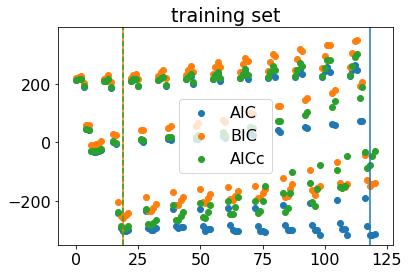

In [29]:
plt.figure()
plt.scatter(range(len(t_AICs)), t_AICs, label='AIC')
plt.scatter(range(len(t_AICs)), t_BICs, label='BIC')
plt.scatter(range(len(t_AICs)), t_AICcs, label='AICc')

plt.axvline(np.argmin(t_AICs), c='C0')
plt.axvline(np.argmin(t_BICs), c='C1')
plt.axvline(np.argmin(t_AICcs), ls='--', c='C2')

plt.legend()
plt.title('training set')

Text(0.5, 1.0, 'validation set')

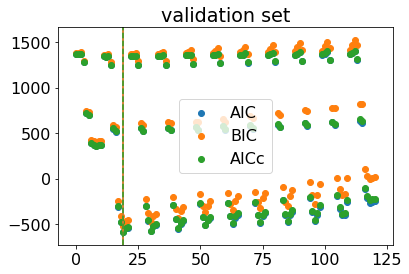

In [30]:
plt.figure()
plt.scatter(range(len(t_AICs)), v_AICs, label='AIC')
plt.scatter(range(len(t_AICs)), v_BICs, label='BIC')
plt.scatter(range(len(t_AICs)), v_AICcs, label='AICc')

plt.axvline(np.argmin(v_AICs), c='C0')
plt.axvline(np.argmin(v_BICs), c='C1')
plt.axvline(np.argmin(v_AICcs), ls='--', c='C2')

plt.legend()
plt.title('validation set')

Text(0, 0.5, '$loss$')

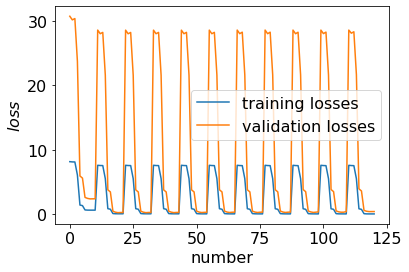

In [31]:
plt.figure()
plt.plot(range(len(t_AICs)), t_losses, label='training losses')
plt.plot(range(len(t_AICs)), v_losses, label='validation losses')
plt.legend()
plt.xlabel('number')
plt.ylabel(r'$loss$')

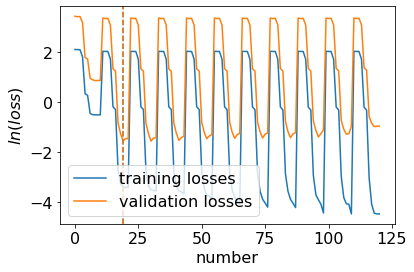

In [32]:
plt.figure()
plt.plot(range(len(t_AICs)), np.log(t_losses), label='training losses')
plt.plot(range(len(t_AICs)), np.log(v_losses), label='validation losses')
plt.legend()
plt.xlabel('number')
plt.ylabel(r'$ln(loss)$')

plt.axvline(lowest_deg_t, c='C0', ls='--')
plt.axvline(lowest_deg_v, c='C1', ls='--')


In [33]:
tloss = best_lr.loss(X, y, method='sum-of-squares')
vloss = best_lr.loss(X_val, y_val, method='sum-of-squares')

In [34]:
print(tloss)

0.03343596129578191


In [35]:
print(vloss)

0.20942494468184347


In [36]:
%%timeit
best_lr.predict(X_val[0].reshape(-1,1))

154 µs ± 1.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


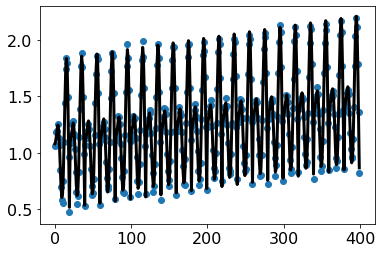

In [37]:
plt.figure()
plt.scatter(range(len(y_val)), y_val, label='validation')
plt.plot(range(len(y_val)), best_lr.predict(X_val), lw=3, c='k', label='final fit')

In [38]:
best_lr.w_ml.shape

(17,)

In [39]:
best_lr.degrees

[[0, 0],
 [1, 0],
 [2, 0],
 [3, 0],
 [4, 0],
 [5, 0],
 [6, 0],
 [7, 0],
 [8, 0],
 [0, 1],
 [1, 1],
 [2, 1],
 [3, 1],
 [4, 1],
 [5, 1],
 [6, 1],
 [7, 1]]